# Clustering con el Método K-Means

In [104]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt # creacion de graficos
import numpy as np # utilizado para hacer calculos cientificos
import pandas as pd # utilizado para el analisis de datos
from scipy.spatial import distance
from sklearn.cluster import KMeans

In [105]:
# Importamos los datos
gd = pd.read_csv('Global_Data_Preprocesado.csv', engine = 'python')

In [106]:
# Mapeo de valores
region_mapping = {
    'EMRO': 1,
    'EURO': 2,
    'AFRO': 3,
    'WPRO': 4,
    'AMRO': 5,
    'SEARO': 6,
    'Other': 7
}

# Aplicar el mapeo a la columna 'WHO_region'
gd['WHO_region'] = gd['WHO_region'].map(region_mapping)

In [107]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333459 entries, 0 to 333458
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   WHO_region         333459 non-null  int64
 1   New_cases          333459 non-null  int64
 2   Cumulative_cases   333459 non-null  int64
 3   New_deaths         333459 non-null  int64
 4   Cumulative_deaths  333459 non-null  int64
dtypes: int64(5)
memory usage: 12.7 MB


In [108]:
gd_variables = gd.copy() # guardar informacion en un objeto llamado gd_variables

In [109]:
gd_variables.describe()
# ver estadisticos del objeto gd_variables
# valores minimo, maximo, priomedio, desv estandar y los cuartiles de cada columna

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,333459.000000,3.334590e+05,3.334590e+05,333459.000000,3.334590e+05
mean,3.329114,2.314590e+03,1.527104e+06,20.926636,1.840111e+04
std,1.450055,3.860689e+04,6.913283e+06,146.903109,7.671683e+04
min,1.000000,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,2.000000,0.000000e+00,2.725000e+03,0.000000,2.100000e+01
50%,3.000000,0.000000e+00,3.782000e+04,0.000000,4.100000e+02
75%,5.000000,1.440000e+02,4.451140e+05,1.000000,5.912000e+03
max,7.000000,6.966046e+06,1.034368e+08,11447.000000,1.138309e+06


### Normalizamos los valores

#### Los valores maximo, minimo y promedio son diferentes entre columnas

In [111]:
gd_norm = (gd_variables-gd_variables.min())/(gd_variables.max()-gd_variables.min())
# Restar a cada celda el valor minimo que se encuentra en su columna y dividirlo entra la resta del maximo menos el minimo
# Se obtiene un valor minimo = 0 y un maximo igual a 1
gd_norm

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0.000000,0.009256,0.00000,0.235184,0.000000
1,0.000000,0.009256,0.00000,0.235184,0.000000
2,0.000000,0.009256,0.00000,0.235184,0.000000
3,0.000000,0.009256,0.00000,0.235184,0.000000
4,0.000000,0.009256,0.00000,0.235184,0.000000
...,...,...,...,...,...
333454,0.333333,0.009256,0.00257,0.235184,0.005028
333455,0.333333,0.009256,0.00257,0.235184,0.005028
333456,0.333333,0.009256,0.00257,0.235184,0.005028
333457,0.333333,0.009256,0.00257,0.235184,0.005028


In [112]:
gd_norm.describe()
# minimo de 0 y maximo de 1

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,333459.000000,333459.000000,333459.000000,333459.000000,333459.000000
mean,0.388186,0.009585,0.014764,0.236582,0.016165
std,0.241676,0.005491,0.066836,0.009815,0.067395
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.009256,0.000026,0.235184,0.000018
50%,0.333333,0.009256,0.000366,0.235184,0.000360
75%,0.666667,0.009276,0.004303,0.235251,0.005194
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Busqueda de la cantidad optima de clusters

##### Calculando que tan similares son los individuos dentro de los clusters

In [113]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10)
    kmeans.fit(gd_norm) #Aplico Kmeans a la base de datos
    wcss.append(kmeans.inertia_)
    

##### Graficando los resultados de WCSS para formar el codo de Jambu

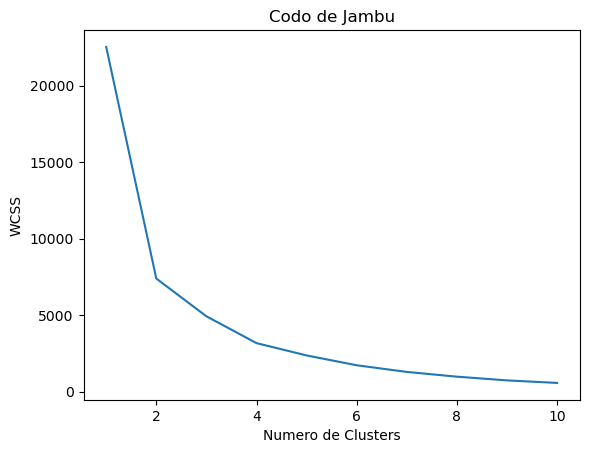

In [95]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambu")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') # WCSS es un indicador de que tan similares son los individuos dentro de los Clusters
plt.show()

### Aplicando el método K-Means a la base de datos

In [115]:
clustering = KMeans(n_clusters = 3, max_iter = 300, n_init = 10) #Crea el modelo
clustering.fit(gd_norm) # Aplica el modelo a la base de datos

KMeans(n_clusters=3, n_init=10)

### Agregando la clasificacion al archivo original

In [97]:
gd['KMeans_Clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
gd.head()

,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,KMeans_Clusters
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


### Visualizando los clusters que se formaron

##### Aplicaremos el analisis de componentes principales para darnos una idea de como se trabajan los clusters

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_gd = pca.fit_transform(gd_norm)
pca_gd_df = pd.DataFrame(data = pca_gd, columns = ['Componente_1', 'Componente_2'])
pca_nombres_gd = pd.concat([pca_gd_df, gd[['KMeans_Clusters']]], axis = 1)

pca_nombres_gd

,Componente_1,Componente_2,KMeans_Clusters
0,-0.388665,-0.010151,0
1,-0.388665,-0.010151,0
2,-0.388665,-0.010151,0
3,-0.388665,-0.010151,0
4,-0.388665,-0.010151,0
...,...,...,...
333454,-0.055320,-0.014867,2
333455,-0.055320,-0.014867,2
333456,-0.055320,-0.014867,2
333457,-0.055320,-0.014867,2


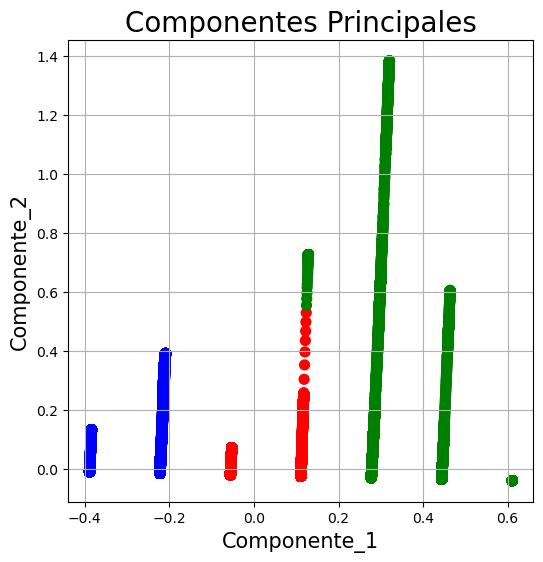

In [100]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente_1', fontsize = 15)
ax.set_ylabel('Componente_2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "red"])
ax.scatter(x = pca_nombres_gd.Componente_1, y = pca_nombres_gd.Componente_2,
              c = color_theme[pca_nombres_gd.KMeans_Clusters], s = 50)

plt.grid(True)  # Mostrar la cuadrícula
plt.show()


### Aplicando cluster con 2 columnas relevantes

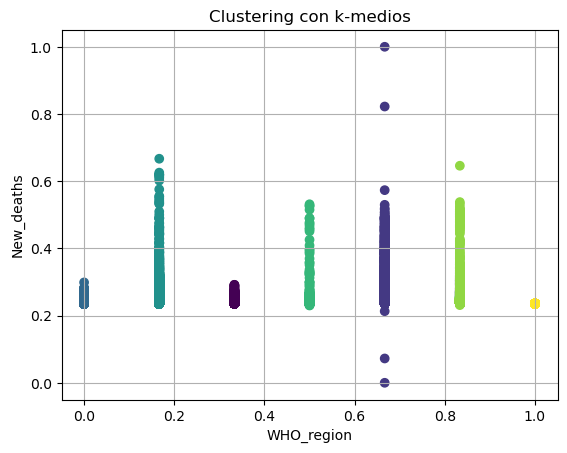

In [103]:
# Seleccionar las columnas relevantes
data = gd_norm[['WHO_region', 'New_deaths']]

# Aplicar k-medios
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)  # Puedes ajustar el número de clusters según tus necesidades
kmeans.fit(data)

# Agregar las etiquetas de los clusters al DataFrame original
gd_norm['Cluster'] = kmeans.labels_

# Visualizar los resultados
plt.scatter(gd_norm['WHO_region'], gd_norm['New_deaths'], c=gd_norm['Cluster'], cmap='viridis')
plt.xlabel('WHO_region')
plt.ylabel('New_deaths')
plt.title('Clustering con k-medios')
plt.grid(True)  # Mostrar la cuadrícula
plt.show()